In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files

In [2]:
uploaded_file_1 = files.upload()

Saving studentAssessment.csv to studentAssessment.csv


In [3]:
studentAssessment = list(uploaded_file_1.keys())[0]
df = pd.read_csv(studentAssessment)

In [19]:
# Tampilkan informasi dasar tentang data
print(df.info())

# Statistik deskriptif
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980

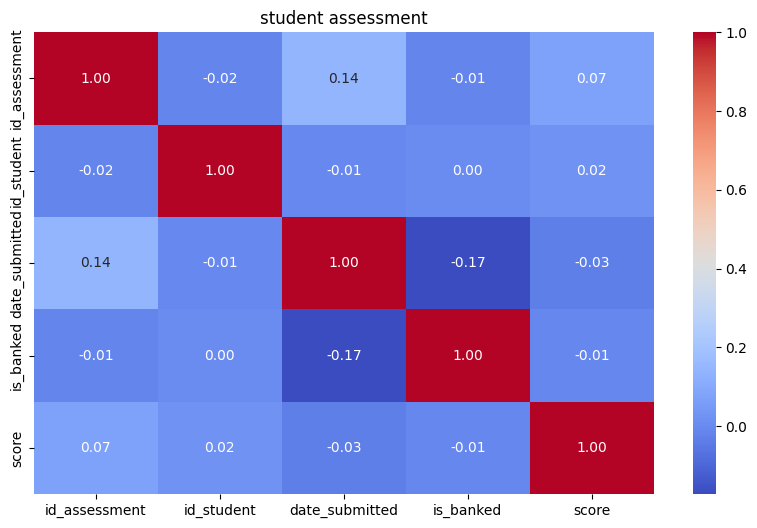

In [4]:
# Korelasi antara variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('student assessment')
plt.show()


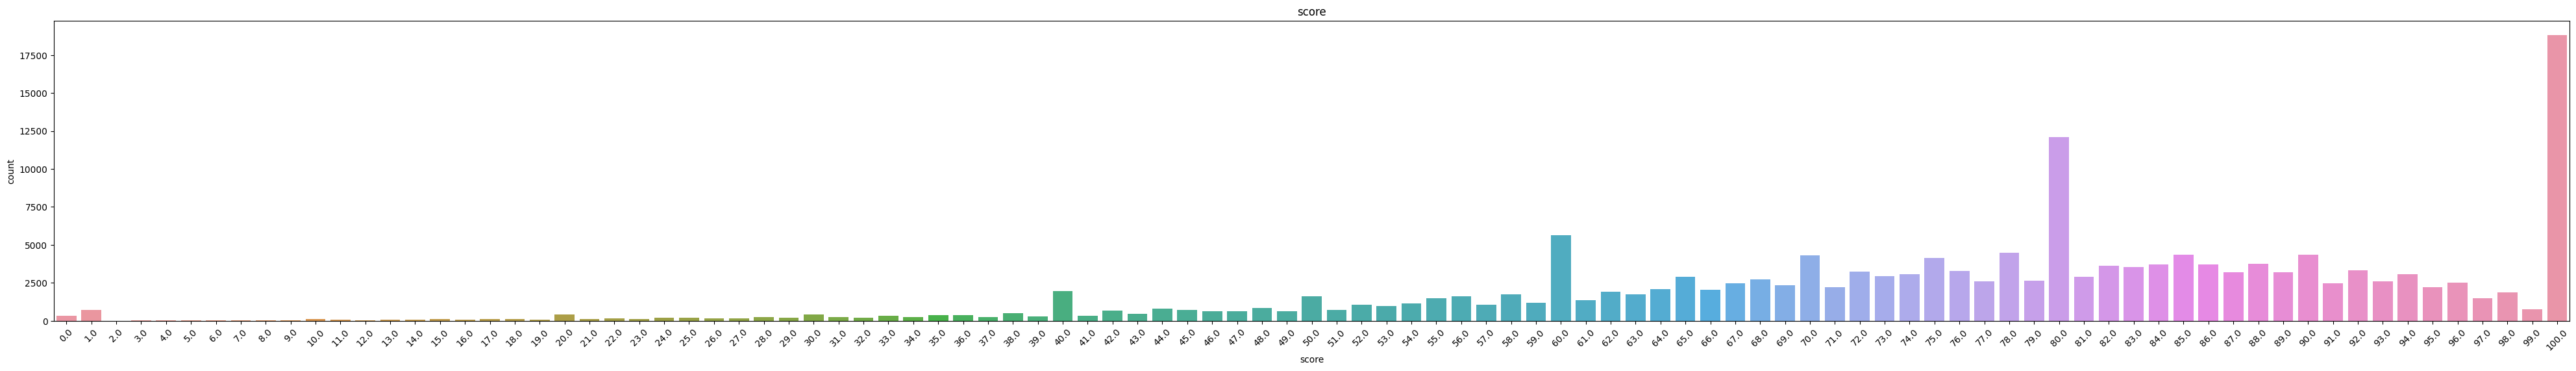

In [12]:
# Visualisasi data kategorikal
plt.figure(figsize=(50, 6))
sns.countplot(x='score', data=df)
plt.title('score')
plt.xticks(rotation=45)
plt.show()


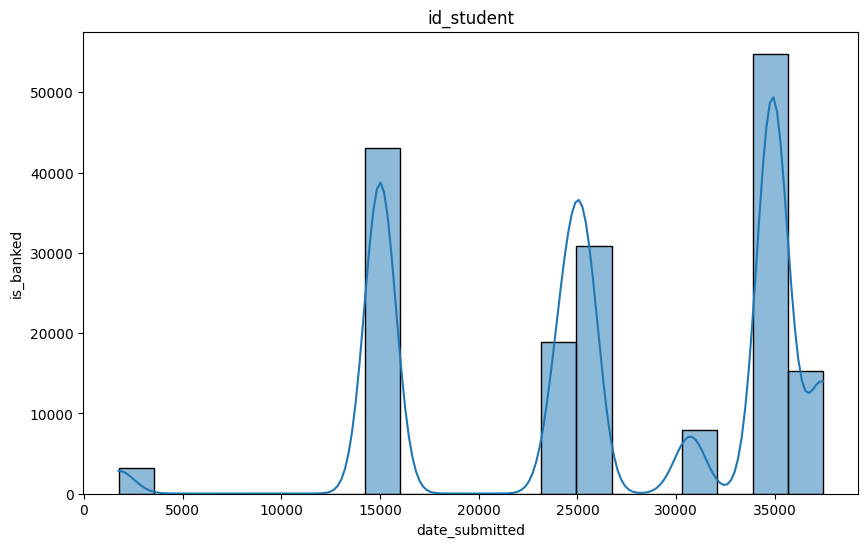

In [13]:
# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(df['id_assessment'], bins=20, kde=True)
plt.title('id_student')
plt.xlabel('date_submitted')
plt.ylabel('is_banked')
plt.show()


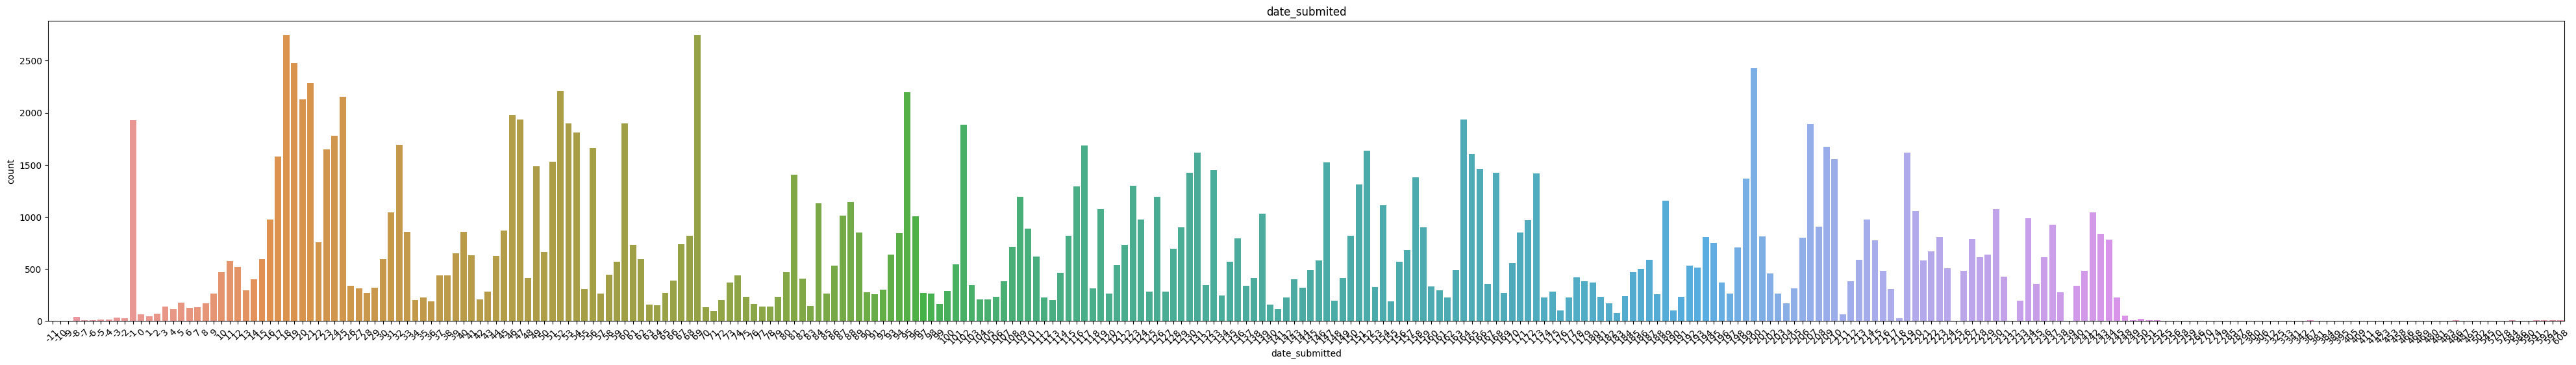

In [18]:
# Visualisasi data kategorikal
plt.figure(figsize=(50, 6))
sns.countplot(x='date_submitted', data=df)
plt.title('date_submited')
plt.xticks(rotation=45)
plt.show()


Preprocessing

In [20]:
df['score'].fillna(df['score'].mean(), inplace=True)

In [22]:
df['score'].fillna(df['score'].mode()[0], inplace=True)


In [23]:
label_encoder = LabelEncoder()
df['score'] = label_encoder.fit_transform(df['score'])


In [25]:
scaler = StandardScaler()
df[['score', 'date_submitted']] = scaler.fit_transform(df[['score', 'date_submitted']])


In [26]:
X = df.drop('date_submitted', axis=1)  # Fitur
y = df['score']  # Target

In [27]:
# Menampilkan 5 baris pertama data setelah preprocessing
print(df.head())

# Menampilkan informasi dasar tentang data setelah preprocessing
print(df.info())

   id_assessment  id_student  date_submitted  is_banked     score
0           1752       11391       -1.371398          0  0.136673
1           1752       28400       -1.315441          0 -0.332619
2           1752       31604       -1.385387          0 -0.228332
3           1752       32885       -1.259485          0 -0.384763
4           1752       38053       -1.357409          0  0.188817
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  float64
 3   is_banked       173912 non-null  int64  
 4   score           173912 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 6.6 MB
None
